<a href="https://colab.research.google.com/github/shila121/projects/blob/main/a_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the dataset
data = pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [6]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [7]:
# segregating independent and dependent variable
x = data.drop(['Survived'],axis = 1)
y = data['Survived']
print(x.shape,y.shape)

(891, 24) (891,)


In [9]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [10]:
x = pd.DataFrame(x_scaled,columns = x.columns)

In [12]:
# train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 56,stratify=y)


In [13]:
# implementing knn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

# creating instance of knn
clf = KNN (n_neighbors = 5)

clf.fit(train_x,train_y)

test_predict = clf.predict(test_x)
k = f1_score(test_predict,test_y)

In [14]:
print('test F1 score -',k)

test F1 score - 0.6785714285714285


In [16]:
# Elbow for classifierhere ,we will try to find the value of /n_neighbors/


def elbow(k):
  test_error = []
  for i in k:
    clf = KNN(n_neighbors=i)
    clf.fit(train_x,train_y)
    tmp = clf.predict(test_x)
    tmp = f1_score(tmp,test_y)
    error = 1-tmp
    test_error.append(error)

  return test_error

In [17]:
k = range(6,20,2)

In [18]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

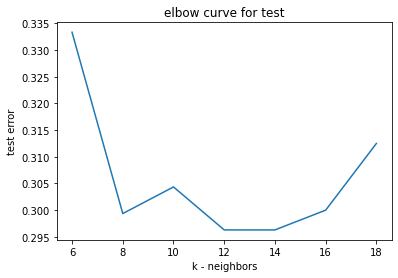

In [19]:
# plot the curves
plt.plot(k,test)
plt.xlabel('k - neighbors')
plt.ylabel('test error')
plt.title('elbow curve for test')

In [20]:
# so n_neighbors = 12 is taken

clf = KNN(n_neighbors=12)
clf.fit(train_x,train_y)

test_predict = clf.predict(test_x)
k = f1_score(test_predict,test_y)
print('Test F1 Score ',k)

Test F1 Score  0.7037037037037037
